Imports & Configuration

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os
import glob

# Set display options for better readability in pandas and seaborn plots.
sns.set_style('whitegrid')
pd.set_option('display.max_columns', None)
pd.options.display.float_format = '{:,.4f}'.format

Data Loading

In [2]:
# Function to load and concatenate all transaction data from pickle files in a specified folder.
def load_transaction_data(folder_path: str) -> pd.DataFrame:
    """
    Loads and concatenates all pickle files from a given folder into a single DataFrame.

    Args:
        folder_path (str): The path to the folder containing the .pkl files.

    Returns:
        pd.DataFrame: A single DataFrame containing all transaction data.
    """
    pkl_files = glob.glob(os.path.join(folder_path, '*.pkl'))
    if not pkl_files:
        raise FileNotFoundError(f"No .pkl files found in the directory: {folder_path}")
    df_list = [pd.read_pickle(file) for file in pkl_files]
    return pd.concat(df_list, ignore_index=True)

# Attempt to load the transaction data. If not found, create an empty DataFrame as a fallback.
try:
    transactions_df = load_transaction_data('data')
except FileNotFoundError as e:
    print(e)
    # For demonstration purposes, creating an empty DataFrame if data is missing.
    transactions_df = pd.DataFrame()

Data inspection

In [3]:
# Display basic information about the loaded dataset, including shape, data types, and a sample.
if not transactions_df.empty:
    print("--- DataFrame Shape ---")
    print(f"The dataset contains {transactions_df.shape[0]:,} rows and {transactions_df.shape[1]} columns.")
    print("\n" + "="*50 + "\n")

    print("--- DataFrame Info ---")
    transactions_df.info()
    print("\n" + "="*50 + "\n")

    print("--- First 5 Rows ---")
    display(transactions_df.head())
else:
    print("DataFrame is empty. Please check the data loading step.")

--- DataFrame Shape ---
The dataset contains 1,754,155 rows and 9 columns.


--- DataFrame Info ---
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1754155 entries, 0 to 1754154
Data columns (total 9 columns):
 #   Column             Dtype         
---  ------             -----         
 0   TRANSACTION_ID     int64         
 1   TX_DATETIME        datetime64[ns]
 2   CUSTOMER_ID        object        
 3   TERMINAL_ID        object        
 4   TX_AMOUNT          float64       
 5   TX_TIME_SECONDS    object        
 6   TX_TIME_DAYS       object        
 7   TX_FRAUD           int64         
 8   TX_FRAUD_SCENARIO  int64         
dtypes: datetime64[ns](1), float64(1), int64(3), object(4)
memory usage: 120.4+ MB


--- First 5 Rows ---


,TRANSACTION_ID,TX_DATETIME,CUSTOMER_ID,TERMINAL_ID,TX_AMOUNT,TX_TIME_SECONDS,TX_TIME_DAYS,TX_FRAUD,TX_FRAUD_SCENARIO
0,0,2018-04-01 00:00:31,596,3156,57.1600,31,0,0,0
1,1,2018-04-01 00:02:10,4961,3412,81.5100,130,0,0,0
2,2,2018-04-01 00:07:56,2,1365,146.0000,476,0,0,0
3,3,2018-04-01 00:09:29,4128,8737,64.4900,569,0,0,0
4,4,2018-04-01 00:10:34,927,9906,50.9900,634,0,0,0


Descriptive Statistics

In [4]:
# Show summary statistics for all columns to understand the data distribution.
if not transactions_df.empty:
    print("--- Descriptive Statistics ---")
    display(transactions_df.describe())

--- Descriptive Statistics ---


,TRANSACTION_ID,TX_DATETIME,TX_AMOUNT,TX_FRAUD,TX_FRAUD_SCENARIO
count,"1,754,155.0000",1754155,"1,754,155.0000","1,754,155.0000","1,754,155.0000"
mean,"877,077.0000",2018-07-01 11:20:33.708572160,53.6323,0.0084,0.0188
min,0.0000,2018-04-01 00:00:31,0.0000,0.0000,0.0000
25%,"438,538.5000",2018-05-16 14:40:46.500000,21.0100,0.0000,0.0000
50%,"877,077.0000",2018-07-01 11:11:10,44.6400,0.0000,0.0000
75%,"1,315,615.5000",2018-08-16 08:01:01.500000,76.9500,0.0000,0.0000
max,"1,754,154.0000",2018-09-30 23:59:57,"2,628.0000",1.0000,3.0000
std,"506,381.0751",NaN,42.3265,0.0911,0.2113


Target Variable Distribution

--- Target Variable Distribution (TX_FRAUD) ---
TX_FRAUD
0   99.1631
1    0.8369
Name: proportion, dtype: float64


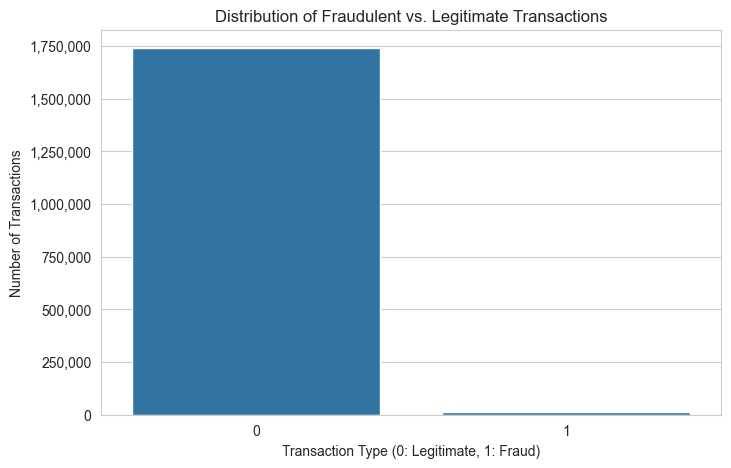

In [5]:
# Visualize and print the distribution of the target variable (fraudulent vs. legitimate transactions).
if 'TX_FRAUD' in transactions_df.columns:
    fraud_distribution = transactions_df['TX_FRAUD'].value_counts(normalize=True) * 100
    print("--- Target Variable Distribution (TX_FRAUD) ---")
    print(fraud_distribution)

    plt.figure(figsize=(8, 5))
    sns.countplot(x='TX_FRAUD', data=transactions_df)
    plt.title('Distribution of Fraudulent vs. Legitimate Transactions')
    plt.ylabel('Number of Transactions')
    plt.xlabel('Transaction Type (0: Legitimate, 1: Fraud)')
    ax = plt.gca()
    ax.get_yaxis().set_major_formatter(plt.FuncFormatter(lambda x, p: format(int(x), ',')))
    plt.show()

Data Cleaning & Type Conversion

In [6]:
# Convert relevant columns to numeric types and sort the DataFrame by transaction time.
print("Data types before conversion:")
print(transactions_df[['CUSTOMER_ID', 'TERMINAL_ID', 'TX_TIME_SECONDS', 'TX_TIME_DAYS']].dtypes)

for col in ['CUSTOMER_ID', 'TERMINAL_ID', 'TX_TIME_SECONDS', 'TX_TIME_DAYS']:
    transactions_df[col] = pd.to_numeric(transactions_df[col])

print("\n" + "="*50 + "\n")
print("Data types after conversion:")
print(transactions_df[['CUSTOMER_ID', 'TERMINAL_ID', 'TX_TIME_SECONDS', 'TX_TIME_DAYS']].dtypes)

# Sorting by transaction datetime ensures correct temporal ordering for feature engineering.
transactions_df = transactions_df.sort_values('TX_DATETIME').reset_index(drop=True)
print("\n" + "="*50 + "\n")
print("DataFrame sorted by TX_DATETIME and index has been reset.")
display(transactions_df.head())

Data types before conversion:
CUSTOMER_ID        object
TERMINAL_ID        object
TX_TIME_SECONDS    object
TX_TIME_DAYS       object
dtype: object


Data types after conversion:
CUSTOMER_ID        int64
TERMINAL_ID        int64
TX_TIME_SECONDS    int64
TX_TIME_DAYS       int64
dtype: object


DataFrame sorted by TX_DATETIME and index has been reset.


,TRANSACTION_ID,TX_DATETIME,CUSTOMER_ID,TERMINAL_ID,TX_AMOUNT,TX_TIME_SECONDS,TX_TIME_DAYS,TX_FRAUD,TX_FRAUD_SCENARIO
0,0,2018-04-01 00:00:31,596,3156,57.1600,31,0,0,0
1,1,2018-04-01 00:02:10,4961,3412,81.5100,130,0,0,0
2,2,2018-04-01 00:07:56,2,1365,146.0000,476,0,0,0
3,3,2018-04-01 00:09:29,4128,8737,64.4900,569,0,0,0
4,4,2018-04-01 00:10:34,927,9906,50.9900,634,0,0,0


Temporal Feature Extraction

In [7]:
# Create features based on the time of transaction to capture potential fraud patterns.
transactions_df['TX_HOUR'] = transactions_df['TX_DATETIME'].dt.hour
transactions_df['TX_DOW'] = transactions_df['TX_DATETIME'].dt.dayofweek

print("--- New Temporal Features Added ---")
display(transactions_df[['TX_DATETIME', 'TX_HOUR', 'TX_DOW']].head())

--- New Temporal Features Added ---


,TX_DATETIME,TX_HOUR,TX_DOW
0,2018-04-01 00:00:31,0,6
1,2018-04-01 00:02:10,0,6
2,2018-04-01 00:07:56,0,6
3,2018-04-01 00:09:29,0,6
4,2018-04-01 00:10:34,0,6


Customer-Centric Features - Transaction Frequency

In [8]:
# Engineer features that count the number of transactions per customer in various time windows.
print("Starting feature engineering for customer transaction counts...")
print("This may take a couple of minutes...")

def calculate_rolling_count(group: pd.DataFrame, window_str: str) -> pd.Series:
    """
    Calculates the number of transactions in a preceding time window for a given group.
    """
    datetimes = group['TX_DATETIME']
    window = pd.Timedelta(window_str)
    window_starts = datetimes - window
    start_indices = datetimes.searchsorted(window_starts, side='left')
    counts = np.arange(len(group)) - start_indices
    return pd.Series(counts, index=group.index)

for window in ['1d', '7d', '30d']:
    col_name = f'CUSTOMER_TX_COUNT_{window.upper()}'
    transactions_df[col_name] = transactions_df.groupby('CUSTOMER_ID', group_keys=False).apply(calculate_rolling_count, window_str=window)
    print(f"Feature '{col_name}' created successfully.")

print("\n--- Customer Transaction Count Features Added ---")
display(transactions_df[transactions_df['CUSTOMER_ID'] == 2][
    ['TX_DATETIME', 'CUSTOMER_ID', 'CUSTOMER_TX_COUNT_1D', 'CUSTOMER_TX_COUNT_7D', 'CUSTOMER_TX_COUNT_30D']
].head(10))

Starting feature engineering for customer transaction counts...
This may take a couple of minutes...


C:\Users\PC\AppData\Local\Temp\ipykernel_26664\1058022725.py:18: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  transactions_df[col_name] = transactions_df.groupby('CUSTOMER_ID', group_keys=False).apply(calculate_rolling_count, window_str=window)


Feature 'CUSTOMER_TX_COUNT_1D' created successfully.


C:\Users\PC\AppData\Local\Temp\ipykernel_26664\1058022725.py:18: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  transactions_df[col_name] = transactions_df.groupby('CUSTOMER_ID', group_keys=False).apply(calculate_rolling_count, window_str=window)


Feature 'CUSTOMER_TX_COUNT_7D' created successfully.
Feature 'CUSTOMER_TX_COUNT_30D' created successfully.

--- Customer Transaction Count Features Added ---


C:\Users\PC\AppData\Local\Temp\ipykernel_26664\1058022725.py:18: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  transactions_df[col_name] = transactions_df.groupby('CUSTOMER_ID', group_keys=False).apply(calculate_rolling_count, window_str=window)


,TX_DATETIME,CUSTOMER_ID,CUSTOMER_TX_COUNT_1D,CUSTOMER_TX_COUNT_7D,CUSTOMER_TX_COUNT_30D
2,2018-04-01 00:07:56,2,0,0,0
9990,2018-04-02 03:39:39,2,0,1,1
17005,2018-04-02 16:06:30,2,1,2,2
19831,2018-04-03 04:28:35,2,1,3,3
30538,2018-04-04 07:07:17,2,0,4,4
30908,2018-04-04 07:50:42,2,1,5,5
32301,2018-04-04 10:07:03,2,2,6,6
34641,2018-04-04 13:25:31,2,3,7,7
38995,2018-04-05 04:06:15,2,4,8,8
52770,2018-04-06 12:00:00,2,0,9,9


Terminal centric features

In [9]:
# Engineer features that count the number of fraudulent transactions per terminal in various time windows.
print("Starting feature engineering for terminal risk scores...")
print("This may take a couple of minutes...")

def calculate_rolling_fraud_sum(group: pd.DataFrame, window_str: str) -> pd.Series:
    """
    Calculates the sum of fraudulent transactions in a preceding time window.
    Only considers transactions strictly before the current one to avoid data leakage.
    """
    datetimes = group['TX_DATETIME']
    is_fraud = group['TX_FRAUD']
    window = pd.Timedelta(window_str)
    window_starts = datetimes - window
    start_indices = datetimes.searchsorted(window_starts, side='left')
    fraud_cumsum = is_fraud.cumsum().to_numpy()
    padded_cumsum = np.concatenate(([0], fraud_cumsum))
    counts = padded_cumsum[np.arange(len(group))] - padded_cumsum[start_indices]
    return pd.Series(counts, index=group.index)

for window in ['1d', '7d', '30d']:
    col_name = f'TERMINAL_FRAUD_COUNT_{window.upper()}'
    transactions_df[col_name] = transactions_df.groupby('TERMINAL_ID', group_keys=False).apply(calculate_rolling_fraud_sum, window_str=window)
    print(f"Feature '{col_name}' created successfully.")

print("\n--- Terminal Risk Score Features Added ---")
known_fraud_terminal_id = transactions_df[transactions_df['TX_FRAUD_SCENARIO']==2]['TERMINAL_ID'].iloc[0]
display(transactions_df[transactions_df['TERMINAL_ID'] == known_fraud_terminal_id][
    ['TX_DATETIME', 'TERMINAL_ID', 'TX_FRAUD', 'TX_FRAUD_SCENARIO', 'TERMINAL_FRAUD_COUNT_7D']
].tail(10))

Starting feature engineering for terminal risk scores...
This may take a couple of minutes...


C:\Users\PC\AppData\Local\Temp\ipykernel_26664\1785699761.py:22: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  transactions_df[col_name] = transactions_df.groupby('TERMINAL_ID', group_keys=False).apply(calculate_rolling_fraud_sum, window_str=window)


Feature 'TERMINAL_FRAUD_COUNT_1D' created successfully.


C:\Users\PC\AppData\Local\Temp\ipykernel_26664\1785699761.py:22: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  transactions_df[col_name] = transactions_df.groupby('TERMINAL_ID', group_keys=False).apply(calculate_rolling_fraud_sum, window_str=window)


Feature 'TERMINAL_FRAUD_COUNT_7D' created successfully.
Feature 'TERMINAL_FRAUD_COUNT_30D' created successfully.

--- Terminal Risk Score Features Added ---


C:\Users\PC\AppData\Local\Temp\ipykernel_26664\1785699761.py:22: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  transactions_df[col_name] = transactions_df.groupby('TERMINAL_ID', group_keys=False).apply(calculate_rolling_fraud_sum, window_str=window)


,TX_DATETIME,TERMINAL_ID,TX_FRAUD,TX_FRAUD_SCENARIO,TERMINAL_FRAUD_COUNT_7D
1678485,2018-09-23 04:34:39,898,0,0,1
1679931,2018-09-23 07:56:21,898,0,0,1
1683444,2018-09-23 13:11:10,898,0,0,1
1684246,2018-09-23 14:21:39,898,0,0,1
1684790,2018-09-23 15:10:08,898,0,0,1
1690820,2018-09-24 10:04:46,898,0,0,1
1694241,2018-09-24 15:12:05,898,0,0,1
1698628,2018-09-25 07:13:22,898,0,0,1
1741905,2018-09-29 15:09:32,898,0,0,0
1743888,2018-09-29 19:54:05,898,0,0,0


Feature selection and model preparation

In [10]:
# Select relevant features for modeling and prepare the feature matrix and target vector.
y = transactions_df['TX_FRAUD']

# Exclude columns that could cause data leakage or are not predictive.
feature_columns = [
    'TX_HOUR', 
    'TX_DOW',
    'CUSTOMER_TX_COUNT_1D', 
    'CUSTOMER_TX_COUNT_7D', 
    'CUSTOMER_TX_COUNT_30D',
    'TERMINAL_FRAUD_COUNT_1D',
    'TERMINAL_FRAUD_COUNT_7D',
    'TERMINAL_FRAUD_COUNT_30D'
]

X = transactions_df[feature_columns]

print("--- Final Feature Matrix (X) and Target Vector (y) Created ---")
print(f"Shape of feature matrix X: {X.shape}")
print(f"Shape of target vector y: {y.shape}")

print("\n--- First 5 rows of the final feature matrix X ---")
display(X.head())

print("\n--- Info on final feature matrix X ---")
X.info()

--- Final Feature Matrix (X) and Target Vector (y) Created ---
Shape of feature matrix X: (1754155, 8)
Shape of target vector y: (1754155,)

--- First 5 rows of the final feature matrix X ---


,TX_HOUR,TX_DOW,CUSTOMER_TX_COUNT_1D,CUSTOMER_TX_COUNT_7D,CUSTOMER_TX_COUNT_30D,TERMINAL_FRAUD_COUNT_1D,TERMINAL_FRAUD_COUNT_7D,TERMINAL_FRAUD_COUNT_30D
0,0,6,0,0,0,0,0,0
1,0,6,0,0,0,0,0,0
2,0,6,0,0,0,0,0,0
3,0,6,0,0,0,0,0,0
4,0,6,0,0,0,0,0,0



--- Info on final feature matrix X ---
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1754155 entries, 0 to 1754154
Data columns (total 8 columns):
 #   Column                    Dtype
---  ------                    -----
 0   TX_HOUR                   int32
 1   TX_DOW                    int32
 2   CUSTOMER_TX_COUNT_1D      int64
 3   CUSTOMER_TX_COUNT_7D      int64
 4   CUSTOMER_TX_COUNT_30D     int64
 5   TERMINAL_FRAUD_COUNT_1D   int64
 6   TERMINAL_FRAUD_COUNT_7D   int64
 7   TERMINAL_FRAUD_COUNT_30D  int64
dtypes: int32(2), int64(6)
memory usage: 93.7 MB


Data split

In [11]:
# Split the data chronologically to avoid data leakage. Use the first 80% for training and the last 20% for testing.
split_index = int(len(X) * 0.8)
X_train, X_test = X.iloc[:split_index], X.iloc[split_index:]
y_train, y_test = y.iloc[:split_index], y.iloc[split_index:]

print("--- Data Splitting Complete ---")
print(f"Training set shape: X_train={X_train.shape}, y_train={y_train.shape}")
print(f"Testing set shape:  X_test={X_test.shape}, y_test={y_test.shape}")
print(f"\nTraining data covers dates from {transactions_df.iloc[0]['TX_DATETIME']} to {transactions_df.iloc[split_index-1]['TX_DATETIME']}")
print(f"Testing data covers dates from {transactions_df.iloc[split_index]['TX_DATETIME']} to {transactions_df.iloc[-1]['TX_DATETIME']}")

--- Data Splitting Complete ---
Training set shape: X_train=(1403324, 8), y_train=(1403324,)
Testing set shape:  X_test=(350831, 8), y_test=(350831,)

Training data covers dates from 2018-04-01 00:00:31 to 2018-08-25 10:32:28
Testing data covers dates from 2018-08-25 10:32:30 to 2018-09-30 23:59:57


Model training

In [12]:
# --- Model Training using LightGBM ---
# Train a LightGBM classifier on the training data. Adjust for class imbalance using scale_pos_weight.
import lightgbm as lgb
from sklearn.metrics import classification_report

print("--- Training LightGBM Classifier ---")

neg_samples = y_train.value_counts()[0]
pos_samples = y_train.value_counts()[1]
scale_pos_weight_value = neg_samples / pos_samples
print(f"Calculated scale_pos_weight: {scale_pos_weight_value:.2f}")

lgb_clf = lgb.LGBMClassifier(
    objective='binary',
    metric='binary_logloss',
    n_estimators=1000,
    learning_rate=0.05,
    num_leaves=31,
    scale_pos_weight=scale_pos_weight_value,
    random_state=42,
    n_jobs=-1
)

lgb_clf.fit(X_train, y_train)
print("\n--- Model Training Complete ---")

--- Training LightGBM Classifier ---
Calculated scale_pos_weight: 120.70
[LightGBM] [Info] Number of positive: 11531, number of negative: 1391793
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.032736 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 320
[LightGBM] [Info] Number of data points in the train set: 1403324, number of used features: 8
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.008217 -> initscore=-4.793309
[LightGBM] [Info] Start training from score -4.793309

--- Model Training Complete ---


Model evaluation

In [13]:
# Evaluate the trained model on the test set and print a detailed classification report.
print("--- Evaluating Model on Test Data ---")

y_pred = lgb_clf.predict(X_test)

print("\n--- Classification Report ---")
# Pay special attention to precision and recall for the fraudulent class (1).
print(classification_report(y_test, y_pred, target_names=['Legitimate (0)', 'Fraud (1)']))

--- Evaluating Model on Test Data ---

--- Classification Report ---
                precision    recall  f1-score   support

Legitimate (0)       1.00      0.98      0.99    347681
     Fraud (1)       0.22      0.63      0.32      3150

      accuracy                           0.98    350831
     macro avg       0.61      0.81      0.65    350831
  weighted avg       0.99      0.98      0.98    350831

